# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
#We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

#matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate the random input data to train on

In [2]:
observations = 1000 #size

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


### Create the targtes we will aim at

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### Plot the training data

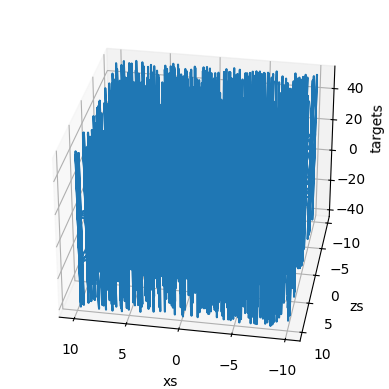

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initialitize variables

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, (2,1))
biases = np.random.uniform(-init_range, init_range, 1)

print(weights)
print(biases)

[[ 0.02244067]
 [-0.01936273]]
[0.02032189]


### Set a learning rate

In [8]:
learning_rate = 0.01

### Train the model

In [11]:
# Gameplan for each iteration:
# Calculate outputs
# Compare outputs to targets through the loss
# Print the loss
# Adjust weights and biases

for i in range(200):
  outputs = np.dot(inputs,weights) + biases #dot matrix
  deltas = outputs - targets
  loss = np.sum(deltas ** 2) / 2 / observations #mean(average) loss
  print(loss)

  deltas_scales = deltas/observations
  weights = weights - learning_rate * np.dot(inputs.T,deltas_scales)#transpose inputs to make it eligible
  biases = biases - learning_rate * np.sum(deltas_scales)


0.32018006961762385
0.31715489727100576
0.314189644089293
0.311283123261979
0.308434171485549
0.3056416484978745
0.3029044366218418
0.300221440318011
0.29759158574613764
0.29501382033538087
0.2924871123630231
0.290010450541534
0.28758284361381387
0.28520331995645337
0.2828709271908519
0.2805847318020387
0.27834381876504233
0.27614729117866416
0.27399426990650133
0.27188389322508216
0.2698153164789716
0.26778771174270644
0.2658002674894266
0.2638521882660717
0.26194269437500806
0.26007102156196377
0.2582364207101447
0.256438157540408
0.25467551231737406
0.25294777956136294
0.2512542677660304
0.24959429912160164
0.24796720924358567
0.24637234690686183
0.24480907378503428
0.24327676419494845
0.24177480484626823
0.24030259459601375
0.23885954420795988
0.2374450761168004
0.23605862419698434
0.23469963353613116
0.23336756021293079
0.2320618710794468
0.2307820435477298
0.22952756538065605
0.22829793448691077
0.22709265872003223
0.22591125568143391
0.22475325252733086
0.22361818577948875
0.222

### Print weights and biases and see if we have worked correctly

In [12]:
print(weights,biases)#results are very close to the target

[[ 2.00220006]
 [-2.99399748]] [4.90068693]


### Plot last outputs vs targets

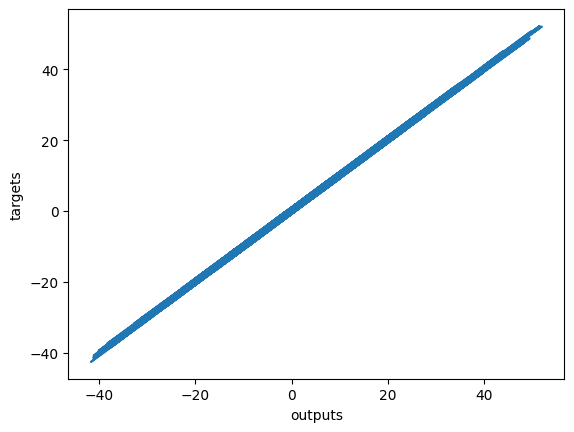

In [13]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

Closer it is to a 45 degree line, the closer the targets and outputs are